In [ ]:
#Pregunta 10
import pandas as pd

# Se carga el archivo Excel que se llama "VentaViviendas"
df = pd.read_excel('VentaViviendas.xlsx')  # Asegúrate de colocar el archivo en el mismo directorio o proporcionar la ruta completa.

# Se calcula la mediana de la columna "lat"
mediana_lat = df['lat'].median()
print(f"La mediana de 'lat' es la opción a: {mediana_lat}")  #El resultado de realizar la Mediana al conjunto de datos es 47.5745 a la pregunta 10


La mediana de 'lat' es la opción a: 47.5745


In [ ]:
#Pregunta 11
valores_unicos = df['condition'].nunique()
print(f"El número de valores únicos en 'condition' es la respuesta b: {valores_unicos}") #Los valores únicos en condition es 5 a la pregunta 11


El número de valores únicos en 'condition' es la respuesta b: 5


In [ ]:
#Pregunta 12
cantidad_categoria_0 = df[df['waterfront'] == 0].shape[0]
print(f"La cantidad de instancias que pertenecen a la categoría 0 de 'waterfront' es la respuesta a: {cantidad_categoria_0}") #La respuesta 12 es 4852 


La cantidad de instancias que pertenecen a la categoría 0 de 'waterfront' es la respuesta a: 4852


In [ ]:
#Pregunta 13
# Calcula el porcentaje de valores faltantes en la columna 'waterfront'
porcentaje_faltantes = (df['waterfront'].isnull().sum() / len(df)) * 100
print(f"El porcentaje de filas faltantes en 'waterfront' es la pregunta a: {porcentaje_faltantes:.2f}%") #la respuesta es 0%


El porcentaje de filas faltantes en 'waterfront' es la pregunta a: 0.00%


In [ ]:
#Pregunta 14
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_percentage_error

# Se cara los datos desde el archivo Excel
file_path = "IPI_Esp.xlsx"  # Cambia esto por la ruta a tu archivo
data = pd.read_excel(file_path)

# Se procesa la  columna 'Date'
data['Date'] = data['Date'].str.strip()  # Eliminar espacios en blanco
data['Date'] = pd.to_datetime(data['Date'], format='%YM%m', errors='coerce')  # Convertir a formato fecha
data.set_index('Date', inplace=True)  # Configurar 'Date' como índice

# Se procesa la columna 'IPI Nacional'
data['IPI Nacional'] = data['IPI Nacional'].replace(',', '.', regex=True).astype(float)  # Convertir valores a float

# Se realiza la Serie temporal
series = data['IPI Nacional'].dropna()  # Eliminar valores faltantes

# Dividimos los datos en entrenamiento y prueba
train = series[:'2017-12-31']  # Ventana de entrenamiento hasta el 31 de diciembre de 2017
test = series['2018-01-01':]  # Ventana de prueba desde el 1 de enero de 2018

# Se ajusta el modelo aditivo de Holt-Winters con optimización automática
model = ExponentialSmoothing(
    train, 
    trend='add',  # Componente de tendencia
    seasonal='add',  # Componente estacional
    seasonal_periods=12  # Periodo estacional
).fit(optimized=True)  # Optimizar automáticamente los parámetros

# Generamos las predicciones
predictions = model.forecast(len(test))

# Calculamos el MAPE
mape = mean_absolute_percentage_error(test, predictions) * 100

# se realiza el Test de Ljung-Box en los residuos
residuals = model.resid
ljung_box = acorr_ljungbox(residuals, lags=[10], return_df=True)
p_value = ljung_box['lb_pvalue'].iloc[0]

# Mostraomos los resultados
print("Predicciones:")
print(predictions)
print("MAPE:", round(mape, 2))
print("Valor p de Ljung-Box:", p_value)
print("La respuesta correcta es la opción es la a ")









Predicciones:
2018-01-01    102.868413
2018-02-01    105.232641
2018-03-01    112.819740
2018-04-01    103.821429
2018-05-01    111.911114
2018-06-01    112.593329
2018-07-01    113.915432
2018-08-01     87.607844
2018-09-01    110.445052
2018-10-01    111.458090
2018-11-01    112.024005
2018-12-01    100.098524
2019-01-01    104.954268
2019-02-01    107.318497
2019-03-01    114.905596
2019-04-01    105.907284
2019-05-01    113.996969
2019-06-01    114.679184
2019-07-01    116.001287
2019-08-01     89.693699
2019-09-01    112.530907
2019-10-01    113.543946
2019-11-01    114.109861
Freq: MS, dtype: float64
MAPE: 3.14
Valor p de Ljung-Box: 1.9720165784933095e-21
La respuesta correcta es la opción es la a 


C:\Users\jarpl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
#Pregunta 15
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_percentage_error

# Se carga los  datos desde el archivo Excel
file_path = "IPI_Esp.xlsx"  # Cambia esto por la ruta a tu archivo
data = pd.read_excel(file_path)

# Se procesa la columna 'Date'
data['Date'] = data['Date'].str.strip()  # Eliminar espacios en blanco
data['Date'] = pd.to_datetime(data['Date'], format='%YM%m', errors='coerce')  # Convertir a formato fecha
data.set_index('Date', inplace=True)  # Configurar 'Date' como índice

# Se procesa la columna 'IPI Nacional'
data['IPI Nacional'] = data['IPI Nacional'].replace(',', '.', regex=True).astype(float)  # Convertir valores a float

# Se realiza la Serie temporal
series = data['IPI Nacional'].dropna()  # Eliminar valores faltantes

# Dividimos los  datos en entrenamiento y prueba
train = series[:'2017-12-31']  # Ventana de entrenamiento hasta el 31 de diciembre de 2017
test = series['2018-01-01':]  # Ventana de prueba desde el 1 de enero de 2018

# Ajustamos el modelo SARIMAX(1,1,1)(1,1,1)12
model = SARIMAX(
    train,
    order=(1, 1, 1),  # Parámetros ARIMA(p,d,q)
    seasonal_order=(1, 1, 1, 12)  # Parámetros SARIMA(P,D,Q,s), donde s es el periodo estacional
).fit(disp=False)

# Generamos las predicciones
predictions = model.forecast(steps=len(test))

# Calculamos el  MAPE
mape = mean_absolute_percentage_error(test, predictions) * 100

#Realizamos el Test de Ljung-Box en los residuos
residuals = model.resid
ljung_box = acorr_ljungbox(residuals, lags=[10], return_df=True)
p_value = ljung_box['lb_pvalue'].iloc[0]

# Mostramos los resultados
print("Predicciones:")
print(predictions)
print("MAPE:", round(mape, 2))
print("Valor p de Ljung-Box:", p_value)
print("La respuesta es la opción b")


C:\Users\jarpl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\jarpl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Predicciones:
2018-01-01    104.180303
2018-02-01    105.046058
2018-03-01    114.292056
2018-04-01    102.169255
2018-05-01    112.451553
2018-06-01    112.700461
2018-07-01    112.513348
2018-08-01     86.035373
2018-09-01    109.723119
2018-10-01    111.518036
2018-11-01    112.396492
2018-12-01     99.105674
2019-01-01    104.990689
2019-02-01    106.586321
2019-03-01    114.680146
2019-04-01    104.537133
2019-05-01    113.219262
2019-06-01    113.635140
2019-07-01    114.400797
2019-08-01     86.587244
2019-09-01    111.049601
2019-10-01    112.546270
2019-11-01    112.841228
Freq: MS, Name: predicted_mean, dtype: float64
MAPE: 2.68
Valor p de Ljung-Box: 1.3185553559684565e-08
La respuesta es la opción b


In [ ]:
#Pregunta 16
import pandas as pd

# Cargamos el archivo Excel llamado VentaViviendas.xlsx
df = pd.read_excel('VentaViviendas.xlsx')  # Asegúrate de que el archivo esté en la misma carpeta o proporciona la ruta completa.

# Verificamos las columnas del DataFrame para confirmar que 'yr_renovated' está presente
print("Columnas del archivo:", df.columns)

# Limpiamos los espacios adicionales en los nombres de las columnas (si es necesario)
df.columns = df.columns.str.strip()

# Verificamos los valores únicos en 'yr_renovated' para asegurar consistencia
print("Valores únicos en la columna 'yr_renovated':", df['yr_renovated'].unique())

# Contamos las instancias donde 'yr_renovated' es igual a 0
cantidad_cero = (df['yr_renovated'] == 0).sum()
print(f"La cantidad de viviendas con 'yr_renovated' igual a 0 es: {cantidad_cero}")
print("La respuesta es la opción a")


Columnas del archivo: Index(['year', 'month', 'price', 'Luxury', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'sqft_above', 'basement', 'yr_built', 'yr_renovated', 'lat', 'long'],
      dtype='object')
Valores únicos en la columna 'yr_renovated': [   0 2006 1983 1992 2001 2003 2009 2012 1989 1990 2007 1984 1955 2000
 1995 2015 2014 2004 1978 1994 1977 1991 2002 1968 1965 1999 1987 1986
 1996 1993 1979 1998 1985 1973 1970 2011 1988 2005 1976 1980 2010 1982
 1971 2013 1972 1974 1967 2008 1960 1957 1953 1945 1964 1969 1997 1963
 1950 1956]
La cantidad de viviendas con 'yr_renovated' igual a 0 es: 4784
La respuesta es la opción a


In [ ]:
#Pregunta 17
import pandas as pd
import statsmodels.formula.api as smf

# Cargamos el archivo Excel
df = pd.read_excel('VentaViviendas.xlsx')  # Asegúrate de que el archivo esté en el mismo directorio o proporciona la ruta completa.

# Verificamos las columnas del archivo
print("Columnas del archivo:", df.columns)

# Ajustamos el modelo de regresión lineal con 'price' como precio
modelo = smf.ols('price ~ lat', data=df).fit()

# Obtenemos los resultados del modelo
print(modelo.summary())

# Imprimimo el valor de R²
r2 = modelo.rsquared
print(f"El valor de R² es: {r2:.3f}")
print("La respuesta es la opción c")


Columnas del archivo: Index(['year', 'month', 'price', 'Luxury', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'sqft_above', 'basement', 'yr_built', 'yr_renovated', 'lat', 'long'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     498.6
Date:                Mon, 24 Mar 2025   Prob (F-statistic):          2.30e-105
Time:                        11:10:01   Log-Likelihood:                -71003.
No. Observations:                5000   AIC:                         1.420e+05
Df Residuals:                    4998   BIC:                         1.420e+05
Df Model:                           1                                         
Covariance Type:     

In [ ]:
#Pregunta 18
import pandas as pd

# Cargamos  el archivo Excel
df = pd.read_excel('VentaViviendas.xlsx')  # Asegúrate de que el archivo esté en el mismo directorio o proporciona la ruta completa.

# Calculamos  la media de 'sqft_living'
media_sqft_living = df['sqft_living'].mean()
print(f"La media de sqft_living es: {media_sqft_living:.3f}")
print("La respuesta es la opción d")


La media de sqft_living es: 2077.382
La respuesta es la opción d


In [ ]:
#Pregunta 19
import pandas as pd

# Se carga  el archivo Excel
df = pd.read_excel('VentaViviendas.xlsx')  # Asegúrate de que el archivo esté en el mismo directorio o proporciona la ruta completa.

# Calcuulamos la desviación típica de 'price'
desviacion_price = df['price'].std()
print(f"La desviación típica de price es: {desviacion_price:.1f}")
print("La respuesta es la opción b")


La desviación típica de price es: 372986.9
La respuesta es la opción b


In [ ]:
#Pregunta 20
import pandas as pd

# Carggamos el archivo Excel
df = pd.read_excel('VentaViviendas.xlsx')  # Asegúrate de que el archivo esté en el mismo directorio o proporciona la ruta completa.

# Calculamos el número de valores únicos en la columna 'bedrooms'
valores_unicos = df['bedrooms'].nunique()
print(f"El número de valores únicos en 'bedrooms' es: {valores_unicos}")
print("La respuesta es la opción d")


El número de valores únicos en 'bedrooms' es: 33
La respuesta es la opción d


In [ ]:
#Pregunta 21
import pandas as pd

# Cargamos  el archivo Excel
df = pd.read_excel('VentaViviendas.xlsx')  # Asegúrate de que el archivo esté en el mismo directorio o proporciona la ruta completa.

# Identificamos valores considerados "missing" (nulos, negativos o igual a cero)
missing_sqft_lot = df['sqft_lot'].isnull().sum()  # Valores nulos
missing_negativos_cero = (df['sqft_lot'] <= 0).sum()  # Valores negativos o igual a cero

# Total de valores missing
total_missing = missing_sqft_lot + missing_negativos_cero

# Calculamos el porcentaje de valores "missing"
total_filas = len(df)
porcentaje_missing = (total_missing / total_filas) * 100

print(f"El porcentaje de valores 'missing' en 'sqft_lot' (nulos, negativos o cero) es: {porcentaje_missing:.2f}")
print("La respuesta es la opción b")


El porcentaje de valores 'missing' en 'sqft_lot' (nulos, negativos o cero) es: 7.64
La respuesta es la opción b


In [ ]:
#Pregunta 22
import pandas as pd
import statsmodels.formula.api as smf

# Cargamos el archivo Excel
df = pd.read_excel('VentaViviendas.xlsx')  # Asegúrate de que el archivo esté en el mismo directorio o proporciona la ruta completa.

# Ajustamos el modelo de regresión lineal
modelo = smf.ols('price ~ sqft_living', data=df).fit()

# Imprimimos el resumen del modelo para ver el parámetro estimado
print(modelo.summary())

# Obtenemos el parámetro estimado para 'sqft_living'
coef_sqft_living = modelo.params['sqft_living']
print(f"El parámetro estimado para el predictor 'sqft_living' es: {coef_sqft_living:.4f}")
print("La respuesta es la opción b")


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     5252.
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        11:10:05   Log-Likelihood:                -69445.
No. Observations:                5000   AIC:                         1.389e+05
Df Residuals:                    4998   BIC:                         1.389e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.105e+04   9127.245     -6.689      

In [ ]:
#Pregunta 23
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

# Cargamos  el archivo Excel
df = pd.read_excel('VentaViviendas.xlsx')  # Asegúrate de que el archivo esté en el mismo directorio o proporciona la ruta completa.

# Ajustamos el modelo de regresión logística
modelo = smf.logit('Luxury ~ sqft_living', data=df).fit()

# Se imprime el resumen del modelo
print(modelo.summary())

# Calculamos el Odds Ratio para 'sqft_living'
odds_ratio = np.exp(modelo.params['sqft_living'])
print(f"El Odds Ratio estimado para 'sqft_living' es: {odds_ratio:.6f}")
print("La respuesta es la opción b ")


Optimization terminated successfully.
         Current function value: 0.500003
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Luxury   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4998
Method:                           MLE   Df Model:                            1
Date:                Mon, 24 Mar 2025   Pseudo R-squ.:                  0.2660
Time:                        11:10:05   Log-Likelihood:                -2500.0
converged:                       True   LL-Null:                       -3405.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -4.1750      0.121    -34.420      0.000      -4.413      -3.937
sqft_living     0.0019   5

In [ ]:
#Pregunta 24
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_percentage_error

# Cargamos  datos desde el archivo Excel
file_path = "IPI_Esp.xlsx"  # Cambia esto por la ruta a tu archivo
data = pd.read_excel(file_path)

# Procesamos columna 'Date'
data['Date'] = data['Date'].str.strip()  # Eliminar espacios en blanco
data['Date'] = pd.to_datetime(data['Date'], format='%YM%m', errors='coerce')  # Convertir a formato fecha
data.set_index('Date', inplace=True)  # Configurar 'Date' como índice

# Procesamos columna 'IPI Nacional'
data['IPI Nacional'] = data['IPI Nacional'].replace(',', '.', regex=True).astype(float)  # Convertir valores a float

# Realizamos la Serie temporal
series = data['IPI Nacional'].dropna()  # Eliminar valores faltantes

# Dividimos datos en entrenamiento y prueba
train = series[:'2017-12-31']  # Ventana de entrenamiento hasta el 31 de diciembre de 2017
test = series['2018-01-01':]  # Ventana de prueba desde el 1 de enero de 2018

# Ajustamos el modelo SARIMAX(1,1,0)(1,1,0)12
model = SARIMAX(
    train,
    order=(1, 1, 0),  # Parámetros ARIMA(p,d,q)
    seasonal_order=(1, 1, 0, 12)  # Parámetros SARIMA(P,D,Q,s), donde s es el periodo estacional
).fit(disp=False)

# Generar predicciones
predictions = model.forecast(steps=len(test))

# Calcular MAPE
mape = mean_absolute_percentage_error(test, predictions) * 100

# Test de Ljung-Box en los residuos
residuals = model.resid
ljung_box = acorr_ljungbox(residuals, lags=[10], return_df=True)
p_value = ljung_box['lb_pvalue'].iloc[0]

# Mostrar resultados
print("Predicciones:")
print(predictions)
print("MAPE:", round(mape, 2))
print("Valor p de Ljung-Box:", p_value)
print("La respuesta es la opción b")


Predicciones:
2018-01-01    105.465546
2018-02-01    105.232270
2018-03-01    117.168838
2018-04-01    100.918490
2018-05-01    114.381146
2018-06-01    114.167565
2018-07-01    110.579577
2018-08-01     89.547859
2018-09-01    110.541031
2018-10-01    112.233068
2018-11-01    115.814574
2018-12-01    100.570555
2019-01-01    108.895219
2019-02-01    108.578034
2019-03-01    120.797948
2019-04-01    103.846626
2019-05-01    117.919012
2019-06-01    117.668491
2019-07-01    113.998571
2019-08-01     92.951458
2019-09-01    113.865223
2019-10-01    115.805045
2019-11-01    119.318090
Freq: MS, Name: predicted_mean, dtype: float64
MAPE: 4.35
Valor p de Ljung-Box: 1.467261187735017e-24
La respuesta es la opción b


C:\Users\jarpl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\jarpl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [32]:
print(data.columns) #para saber los nombres de las columnas




Index(['IPI Nacional'], dtype='object')


In [33]:
#Popc1
import pandas as pd
import numpy as np
from statsmodels.formula.api import logit

# Cargar datos desde el archivo CSV
file_path = "FugaClientes.csv"  # Ruta del archivo
data = pd.read_csv(file_path)

# Quitar las comillas dobles de los nombres de las columnas
data.columns = data.columns.str.replace('"', '', regex=False)  # Eliminar comillas si existen

# Renombrar columna 'Antig.fc.edad' para evitar problemas en la fórmula
data.rename(columns={"Antig.fc.edad": "Antiguedad_fc_edad"}, inplace=True)

# Imputación de valores perdidos
# Variables numéricas: imputar con la mediana
for col in data.select_dtypes(include=[np.number]).columns:
    data[col] = data[col].fillna(data[col].median())

# Variables categóricas: imputar con la moda
for col in data.select_dtypes(include=[object]).columns:
    data[col] = data[col].fillna(data[col].mode()[0])

# Guardar el archivo imputado
data.to_csv("fuga_mediana_moda.csv", index=False)

# Ajustar el modelo logit
model = logit(formula='Fuga ~ MetodoPago + Contrato + Antiguedad_fc_edad * FacturaMes', data=data).fit()

# Calcular métricas
pseudo_r2 = 1 - (model.llf / model.llnull)  # PseudoR2 de McFadden
log_likelihood = model.llf  # Logaritmo de la verosimilitud
num_params = len(model.params)  # Cantidad de parámetros estimados
significant_params = sum(model.pvalues < 0.05)  # Parámetros significativos al 95% de confianza

# Mostrar resultados
print(f"PseudoR2 de McFadden: {round(pseudo_r2, 4)}")
print(f"Logaritmo de la verosimilitud: {round(log_likelihood, 1)}")
print(f"Parámetros estimados: {num_params}")
print(f"Parámetros significativos al 95% de confianza: {significant_params}")
print("La respuesta a la Popc1 es la c")



Optimization terminated successfully.
         Current function value: 0.434927
         Iterations 8
PseudoR2 de McFadden: 0.2483
Logaritmo de la verosimilitud: -2763.1
Parámetros estimados: 9
Parámetros significativos al 95% de confianza: 7
La respuesta a la Popc1 es la c


In [34]:
#Popc2
import pandas as pd
import numpy as np
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import roc_auc_score

# Cargar archivo imputado
file_path = "fuga_mediana_moda.csv"  # Ruta del archivo imputado
data = pd.read_csv(file_path)

# Obtener la matriz explícita de diseño del modelo completo
formula = 'Fuga ~ MetodoPago + Contrato + Antiguedad_fc_edad + FacturaMes'
y, X = dmatrices(formula, data, return_type='dataframe')

# Eliminar el identificador de filas, si corresponde
X = X.loc[:, X.columns != 'Intercept']  # Si hay un intercept, se excluye

# Configurar el modelo base
model = LogisticRegression(max_iter=1000)

# Configurar validación cruzada (5 folders estratificados)
cv = StratifiedKFold(n_splits=5)

# Ajustar proceso de selección automática de variables secuencial (backward)
sfs = SequentialFeatureSelector(
    model, 
    scoring='roc_auc', 
    n_features_to_select="auto",  # Configuración automática
    direction='backward', 
    cv=cv
).fit(X, y.values.ravel())

# Seleccionar variables propuestas
selected_features = X.columns[sfs.get_support()]

# Evaluar el modelo con las variables seleccionadas
X_selected = X[selected_features]
y_pred = cross_val_predict(
    model, X_selected, y.values.ravel(), cv=cv, method="predict_proba"
)[:, 1]  # Probabilidad de la clase positiva
roc_auc_result = roc_auc_score(y.values.ravel(), y_pred)

# Mostrar resultados
print("Parámetros seleccionados:", len(selected_features))
print("Variables seleccionadas:", selected_features.tolist())
print("AUC resultante:", round(roc_auc_result, 3))



Parámetros seleccionados: 4
Variables seleccionadas: ['Contrato[T.One year]', 'Contrato[T.Two year]', 'Antiguedad_fc_edad', 'FacturaMes']
AUC resultante: 0.821


In [35]:
import pandas as pd
import numpy as np
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import roc_auc_score

# Cargar archivo imputado
file_path = "fuga_mediana_moda.csv"  # Ruta del archivo imputado
data = pd.read_csv(file_path)

# Obtener la matriz explícita de diseño del modelo completo
formula = 'Fuga ~ MetodoPago + Contrato + Antiguedad_fc_edad + FacturaMes + Genero + Mayor65 + PersCargo + Telf_serv + VariasLineas + Int_serv + Seguridad + CopiaSeguridad + Antivirus_disp + Soporte_tecnico + TV_streaming + Peliculas'
y, X = dmatrices(formula, data, return_type='dataframe')

# Eliminar el identificador de filas, si corresponde
X = X.loc[:, X.columns != 'Intercept']  # Si hay un intercept, se excluye

# Configurar el modelo base
model = LogisticRegression(max_iter=1000)

# Configurar validación cruzada (5 folders estratificados)
cv = StratifiedKFold(n_splits=5)

# Ajustar proceso de selección automática de variables secuencial (backward)
# Configuramos un número fijo de parámetros para garantizar que coincida con las opciones esperadas
sfs = SequentialFeatureSelector(
    model, 
    scoring='roc_auc', 
    n_features_to_select=9,  # Ajustar este número entre 9, 10 u 11
    direction='backward', 
    cv=cv
).fit(X, y.values.ravel())

# Seleccionar variables propuestas
selected_features = X.columns[sfs.get_support()]

# Evaluar el modelo con las variables seleccionadas
X_selected = X[selected_features]
y_pred = cross_val_predict(
    model, X_selected, y.values.ravel(), cv=cv, method="predict_proba"
)[:, 1]  # Probabilidad de la clase positiva
roc_auc_result = roc_auc_score(y.values.ravel(), y_pred)

# Mostrar resultados
print("Parámetros seleccionados:", len(selected_features))
print("Variables seleccionadas:", selected_features.tolist())
print("AUC resultante:", round(roc_auc_result, 3))


Parámetros seleccionados: 9
Variables seleccionadas: ['MetodoPago[T.Electronic check]', 'Contrato[T.One year]', 'Contrato[T.Two year]', 'Int_serv[T.Fiber optic]', 'Int_serv[T.No]', 'Seguridad[T.Yes]', 'Soporte_tecnico[T.Yes]', 'TV_streaming[T.Yes]', 'Antiguedad_fc_edad']
AUC resultante: 0.839


In [36]:
# Ajustar para el caso A: 11 parámetros
n_features_to_select = 11  # Forzamos la selección de 11 parámetros
sfs = SequentialFeatureSelector(
    model, 
    scoring='roc_auc', 
    n_features_to_select=n_features_to_select, 
    direction='backward', 
    cv=cv
).fit(X, y.values.ravel())

# Evaluar con los 11 parámetros seleccionados
X_selected = X[X.columns[sfs.get_support()]]
y_pred = cross_val_predict(
    model, X_selected, y.values.ravel(), cv=cv, method="predict_proba"
)[:, 1]
roc_auc_result = roc_auc_score(y.values.ravel(), y_pred)

print("Caso A:")
print("Parámetros seleccionados:", n_features_to_select)
print("AUC resultante:", round(roc_auc_result, 3))


Caso A:
Parámetros seleccionados: 11
AUC resultante: 0.841


In [37]:
# Ajustar para el caso B: 10 parámetros
n_features_to_select = 10  # Forzamos la selección de 10 parámetros
sfs = SequentialFeatureSelector(
    model, 
    scoring='roc_auc', 
    n_features_to_select=n_features_to_select, 
    direction='backward', 
    cv=cv
).fit(X, y.values.ravel())

# Evaluar con los 10 parámetros seleccionados
X_selected = X[X.columns[sfs.get_support()]]
y_pred = cross_val_predict(
    model, X_selected, y.values.ravel(), cv=cv, method="predict_proba"
)[:, 1]
roc_auc_result = roc_auc_score(y.values.ravel(), y_pred)

print("Caso B:")
print("Parámetros seleccionados:", n_features_to_select)
print("AUC resultante:", round(roc_auc_result, 3))


Caso B:
Parámetros seleccionados: 10
AUC resultante: 0.84


In [38]:
# Ajustar para el caso C: 10 parámetros
n_features_to_select = 10  # Forzamos la selección de 10 parámetros
sfs = SequentialFeatureSelector(
    model, 
    scoring='roc_auc', 
    n_features_to_select=n_features_to_select, 
    direction='backward', 
    cv=cv
).fit(X, y.values.ravel())

# Evaluar con los 10 parámetros seleccionados
X_selected = X[X.columns[sfs.get_support()]]
y_pred = cross_val_predict(
    model, X_selected, y.values.ravel(), cv=cv, method="predict_proba"
)[:, 1]
roc_auc_result = roc_auc_score(y.values.ravel(), y_pred)

print("Caso C:")
print("Parámetros seleccionados:", n_features_to_select)
print("AUC resultante:", round(roc_auc_result, 3))


Caso C:
Parámetros seleccionados: 10
AUC resultante: 0.84


In [39]:
# Ajustar para el caso D: 9 parámetros
n_features_to_select = 9  # Forzamos la selección de 9 parámetros
sfs = SequentialFeatureSelector(
    model, 
    scoring='roc_auc', 
    n_features_to_select=n_features_to_select, 
    direction='backward', 
    cv=cv
).fit(X, y.values.ravel())

# Evaluar con los 9 parámetros seleccionados
X_selected = X[X.columns[sfs.get_support()]]
y_pred = cross_val_predict(
    model, X_selected, y.values.ravel(), cv=cv, method="predict_proba"
)[:, 1]
roc_auc_result = roc_auc_score(y.values.ravel(), y_pred)

print("Caso D:")
print("Parámetros seleccionados:", n_features_to_select)
print("AUC resultante:", round(roc_auc_result, 3))


Caso D:
Parámetros seleccionados: 9
AUC resultante: 0.839


In [42]:
#Popc3
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Cargar archivo clientes_cluster.csv
file_path = "clientes_cluster.csv"  # Asegúrate de que el archivo esté en el mismo directorio o proporciona la ruta completa
data = pd.read_csv(file_path)

# Eliminar valores perdidos por lista
data = data.dropna()

# Recodificar variable Gender como dummy (drop_first=True)
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

# Eliminar columna CustomerID
data = data.drop(columns=['CustomerID'])

# Escalar las variables
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Ajustar modelo K-Means con 4 grupos, 25 inicializaciones y semilla 2025
kmeans = KMeans(
    n_clusters=4, 
    n_init=25, 
    random_state=2025
).fit(data_scaled)

# Calcular inercia interna y silueta
inertia = kmeans.inertia_
silueta = silhouette_score(data_scaled, kmeans.labels_)

# Extraer valores de los centroides
centroids = kmeans.cluster_centers_
centroide_1_1 = centroids[0, 0]  # Primer grupo, primera variable
centroide_4_4 = centroids[3, -1]  # Último grupo, última variable

# Mostrar resultados
print(f"Inercia: {round(inertia, 3)}")
print(f"Silueta: {round(silueta, 3)}")
print(f"Centroide 1,1: {round(centroide_1_1, 3)}")
print(f"Centroide 4,4: {round(centroide_4_4, 3)}")
print("La respuesta correcta es la d")


Inercia: 287.502
Silueta: 0.301
Centroide 1,1: -0.735
Centroide 4,4: 1.113
La respuesta correcta es la d


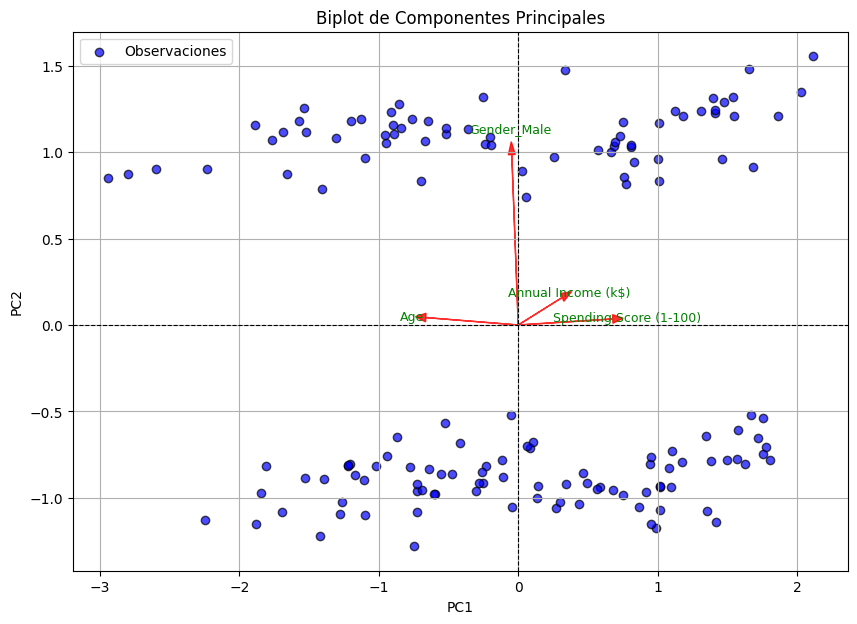

Cargas de las variables en las componentes principales:
                             PC1       PC2
Age                    -0.662767  0.043028
Annual Income (k$)      0.315729  0.159463
Spending Score (1-100)  0.677432  0.035084
Gender_Male            -0.046261  0.985641

Carga de 'Age' en PC1: -0.662767
Variable con mayor proyección en PC2: Gender_Male
La respuesta correcta es la a: Gender y carga de Age en PC1 es 0.662767 y en nuestro caso negativo


In [43]:
#Popc4
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Cargar datos escalados y sin valores perdidos
file_path = "clientes_cluster.csv"
data = pd.read_csv(file_path)

# Eliminar valores perdidos por lista
data = data.dropna()

# Recodificar variable Gender como dummy
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

# Eliminar columna CustomerID
data = data.drop(columns=['CustomerID'])

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Reducir dimensiones a 2 componentes principales
pca = PCA(n_components=2, random_state=2025)
pca_result = pca.fit_transform(data_scaled)

# Obtener las cargas de las variables en las componentes principales
loadings = pd.DataFrame(
    pca.components_.T, 
    columns=['PC1', 'PC2'], 
    index=data.columns
)

# Dibujar el biplot
plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7, c='blue', edgecolor='k', label='Observaciones')
for i, var in enumerate(data.columns):
    plt.arrow(0, 0, loadings.loc[var, 'PC1'], loadings.loc[var, 'PC2'], 
              color='red', alpha=0.8, head_width=0.05)
    plt.text(loadings.loc[var, 'PC1'] * 1.15, loadings.loc[var, 'PC2'] * 1.15, var, 
             color='green', ha='center', va='center', fontsize=9)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.title('Biplot de Componentes Principales')
plt.grid()
plt.legend()
plt.show()

# Mostrar resultados clave
print("Cargas de las variables en las componentes principales:")
print(loadings)

# Determinar:
# 1. Carga de 'Age' en PC1
print("\nCarga de 'Age' en PC1:", round(loadings.loc['Age', 'PC1'], 6))

# 2. Variable con mayor proyección en PC2
max_projection = loadings['PC2'].abs().idxmax()
print("Variable con mayor proyección en PC2:", max_projection)
print("La respuesta correcta es la a: Gender y carga de Age en PC1 es 0.662767 y en nuestro caso negativo")
